In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost

Note: you may need to restart the kernel to use updated packages.


In [242]:
import pandas as pd

data = pd.read_csv("online_shoppers_intention.csv")

print(data.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [243]:
missing = data.isnull().sum()
missing

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

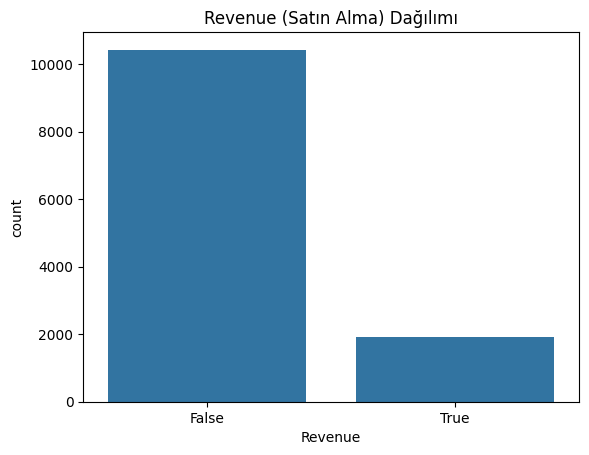

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


In [244]:
sns.countplot(x='Revenue', data=data)
plt.title("Revenue (Satın Alma) Dağılımı")
plt.show()

print(data['Revenue'].value_counts(normalize=True))


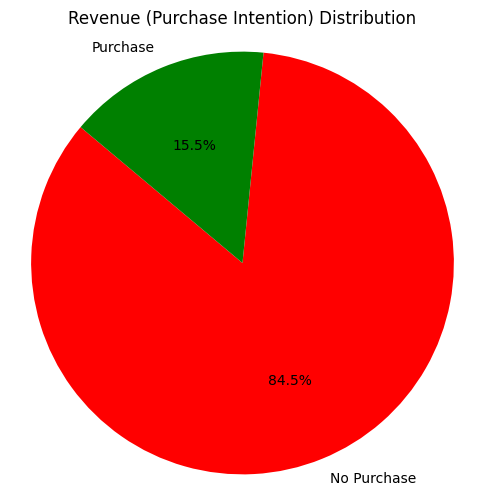

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
# 📊 Pie Chart for Revenue Distribution
revenue_counts = data['Revenue'].value_counts()
labels = ['No Purchase', 'Purchase']
colors = ['Red', 'green']
explode = (0.05, 0.1)  

plt.figure(figsize=(6,6))
plt.pie(revenue_counts, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors)
plt.title('Revenue (Purchase Intention) Distribution')
plt.axis('equal')  
plt.show()

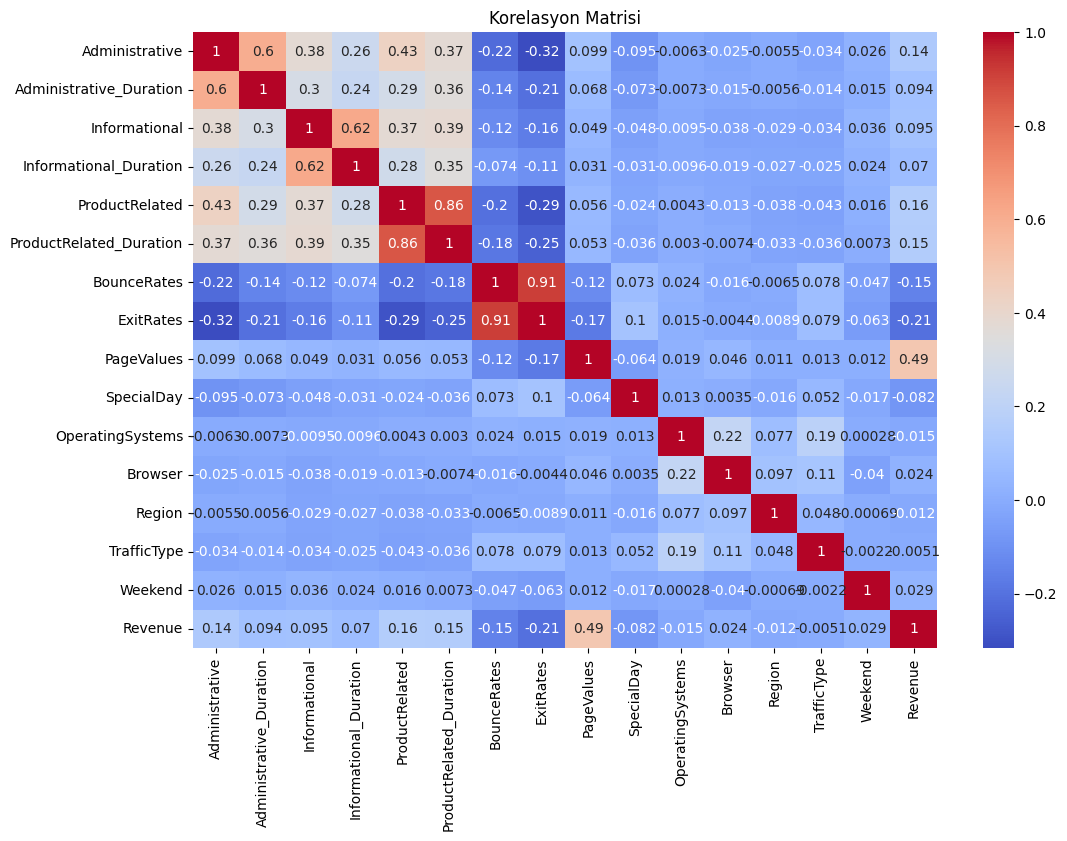

In [246]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [248]:
# boolean to int
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [249]:
# one hot encoding for month feature (adds 11 new feature)
data = pd.get_dummies(data, columns=['Month'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

In [250]:
# visitor type (label encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

In [251]:
# Tüm bool kolonları int'e çevir
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

In [252]:
# rebalance
X = data.drop('Revenue', axis=1)
y = data['Revenue']

print(y.value_counts(normalize=True))


Revenue
0    0.845255
1    0.154745
Name: proportion, dtype: float64


In [253]:
# boşluğa kadarki yöntemler kullanılarak sonuçlar alındı. ayrıca feature selection için de REF kullnıldı diğerleri değil.

In [254]:
# Aşağıdakilere alternatif bir yol. sıralama farklı. önce scale en son split.

# Majority is no answers and minority is yes answers.
major = data[y == 0]
minor = data[y == 1]

In [255]:

from sklearn.utils import resample

major_downsampled = resample(major,
                             replace=False,   # Samples without replacement
                             n_samples=len(major), # Match the minority size
                             random_state=42) # Ensures reproducibility

minor_upsampled = resample(minor,
                           replace=True,    # Samples with replacement
                           n_samples=len(major), # Match the majority size
                           random_state=42) # Ensures reproducibility

# Oversampled and Undersampled parts are concated.
balanced_data = pd.concat([major, minor_upsampled])

# New balanced dataset
X = balanced_data.drop('Revenue', axis=1)
y = balanced_data['Revenue']

In [256]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# RFE feature selectiona kadar diğer kodlar kullanılmadı. feature selection RFE ile yapıldı.

In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    random_state=42,    
    stratify=y         
)


In [38]:
# reblance only train set
!pip install imbalanced-learn

In [239]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [122]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


In [151]:
# combination of SMOTE and undersampling
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)


In [152]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [97]:
# feature selection process with Rnadom Forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)

importance = rf_model.feature_importances_
features = X_train_res_df.columns
feature_importance = sorted(zip(features, importance), key=lambda x: x[1], reverse=True)

feature_importances = pd.DataFrame({
    'Feature': X.columns,                
    'Importance': rf.feature_importances_  
}).sort_values(by='Importance', ascending=False)  

feature_importances

,Feature,Importance
8,PageValues,0.372713
7,ExitRates,0.092156
5,ProductRelated_Duration,0.084000
4,ProductRelated,0.075663
1,Administrative_Duration,0.059572
6,BounceRates,0.053872
0,Administrative,0.040642
12,Region,0.030941
13,TrafficType,0.030665
3,Informational_Duration,0.026763


C:\Users\Büşranur\AppData\Local\Temp\ipykernel_14188\1274276642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


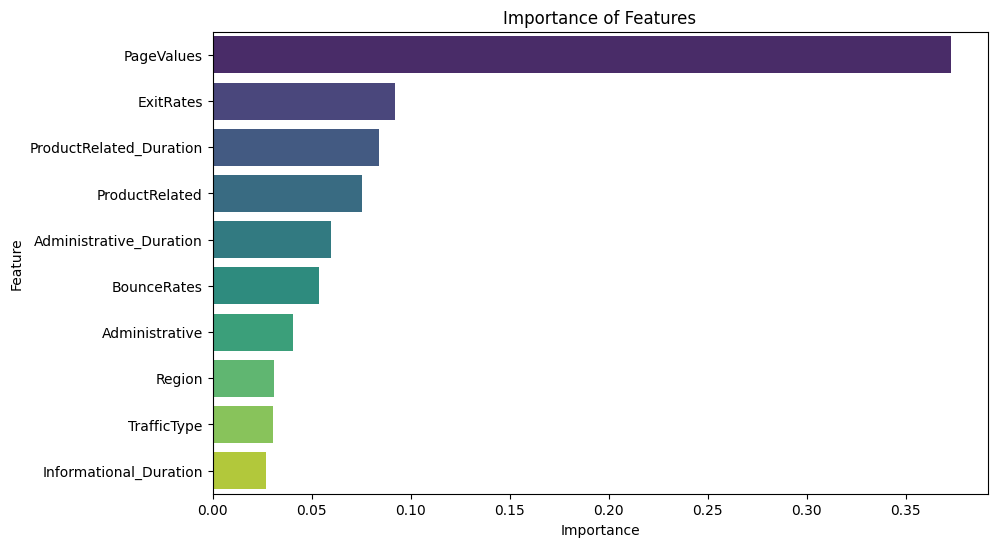

In [98]:

import matplotlib.pyplot as plt
import seaborn as sns

top_features = feature_importances.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Importance of Features')
plt.show()

In [71]:
# Importance > 0.01 olan özelliklerin isimlerini al
important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()

# Seçilen özelliklerle X_train ve X_test'i yeniden oluşturma
X_train_selected = X_train_res[important_features]
X_test_selected = X_test_res[important_features]

print("Selected Features:", important_features)
print("New shape of X_train:", X_train_selected.shape)
print("New shape of X_test:", X_test_selected.shape)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [258]:
# feature selection with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

selector = RFE(estimator=LogisticRegression(), n_features_to_select=10)
X_train_selected = selector.fit_transform(X_train_res, y_train_res)
X_test_selected = selector.transform(X_test)


c:\users\büşranur\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\büşranur\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [208]:
# training process

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [259]:
log_model = LogisticRegression(random_state=42)

log_model.fit(X_train_selected, y_train_res)

y_pred = log_model.predict(X_test_selected)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.40      0.53      2094
           1       0.60      0.88      0.71      2075

    accuracy                           0.64      4169
   macro avg       0.69      0.64      0.62      4169
weighted avg       0.69      0.64      0.62      4169

[[ 846 1248]
 [ 240 1835]]


In [210]:
print(X_train.shape)  # Özelliklerin sayısı ve örnek sayısı
print(y_train.shape)  # Etiketlerin sayısı


(16675, 25)
(16675,)


In [211]:
print(X_train_res.shape)  # Resampled eğitim verisi boyutu
print(y_train_res.shape)  # Resampled etiket verisi boyutu


(16332, 25)
(16332,)


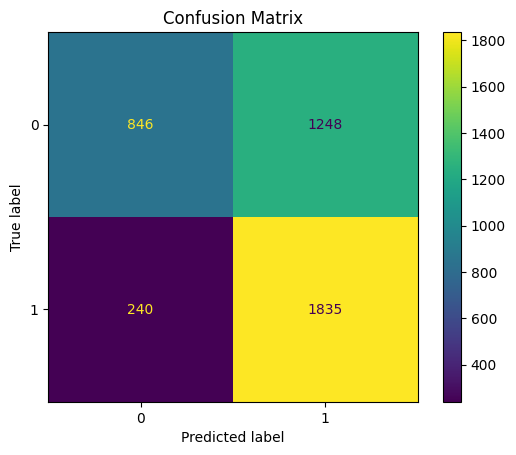

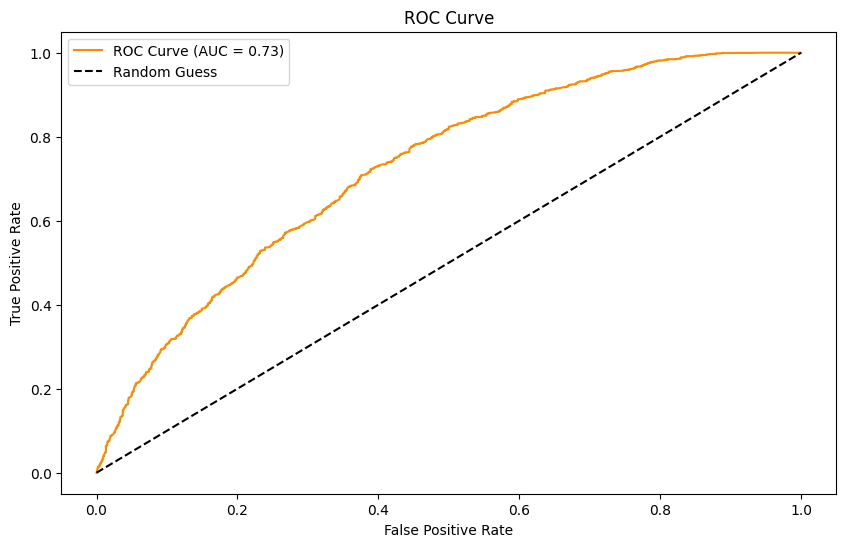

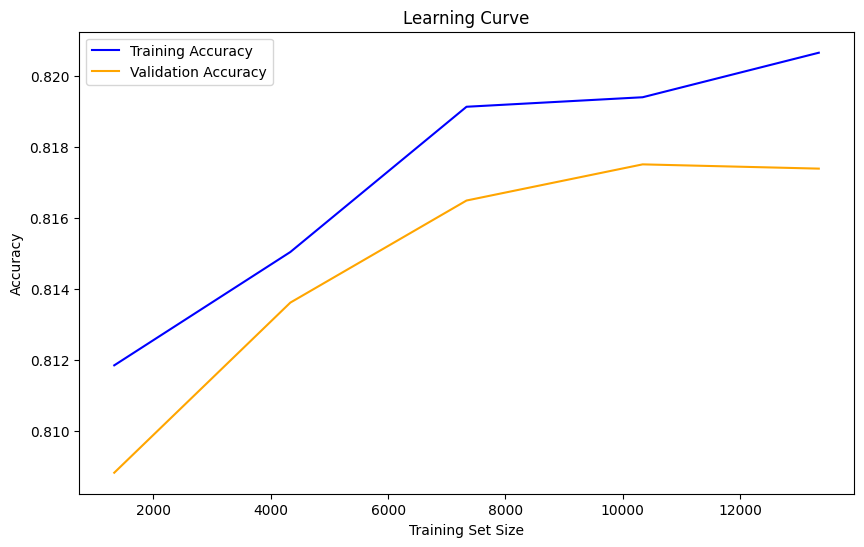

In [260]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = log_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [227]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_model.fit(X_train_selected, y_train_res)


y_pred_rf = rf_model.predict(X_test_selected)


print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67      2094
           1       0.67      0.89      0.76      2075

    accuracy                           0.73      4169
   macro avg       0.75      0.73      0.72      4169
weighted avg       0.75      0.73      0.72      4169

[[1182  912]
 [ 232 1843]]


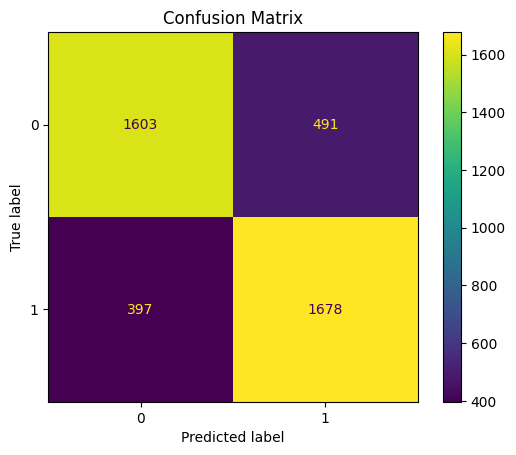

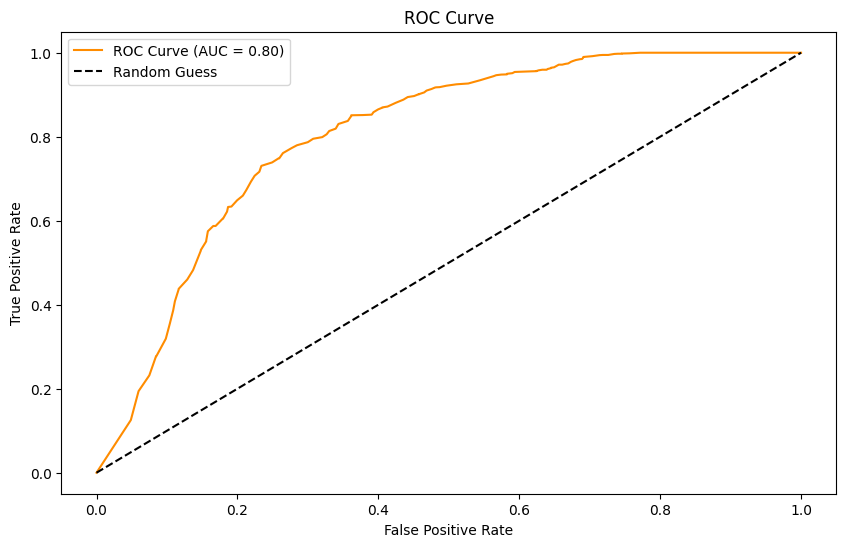

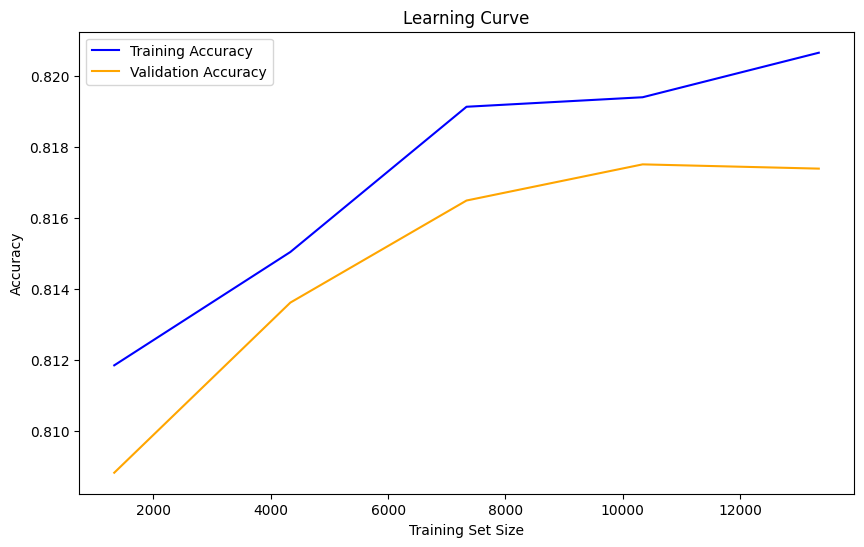

In [228]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = rf_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [218]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train_selected, y_train_res)

y_pred_xgb = xgb_model.predict(X_test_selected)

print("XGBoost Classifier Results:")
print(classification_report(y_test, y_pred_xgb, zero_division=1))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2094
           1       0.50      1.00      0.66      2075

    accuracy                           0.50      4169
   macro avg       0.75      0.50      0.33      4169
weighted avg       0.75      0.50      0.33      4169

[[   0 2094]
 [   0 2075]]


In [216]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_selected, y_train_res)

y_pred_gb = gb_model.predict(X_test_selected)

print("Gradient Boosting Classifier Results:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      2094
           1       0.65      0.91      0.76      2075

    accuracy                           0.71      4169
   macro avg       0.75      0.71      0.70      4169
weighted avg       0.75      0.71      0.70      4169

[[1076 1018]
 [ 193 1882]]


In [217]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)

lgbm_model.fit(X_train_selected, y_train_res)

y_pred_lgbm = lgbm_model.predict(X_test_selected)

print("LightGBM Classifier Results:")
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 8166, number of negative: 8166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 16332, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classifier Results:
              precision    recall  f1-score   support

           0       0.85      0.54      0.66      2094
           1       0.66      0.91      0.76      2075

    accuracy                           0.72      4169
   macro avg       0.76      0.72      0.71      4169
weighted avg       0.76      0.72      0.71      4169

[[1125  969]
 [ 192 1883]]


In [219]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_selected, y_train_res)
y_pred_svm = svm_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_svm, zero_division=1))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2094
           1       0.84      0.74      0.79      2075

    accuracy                           0.80      4169
   macro avg       0.81      0.80      0.80      4169
weighted avg       0.81      0.80      0.80      4169

[[1803  291]
 [ 534 1541]]


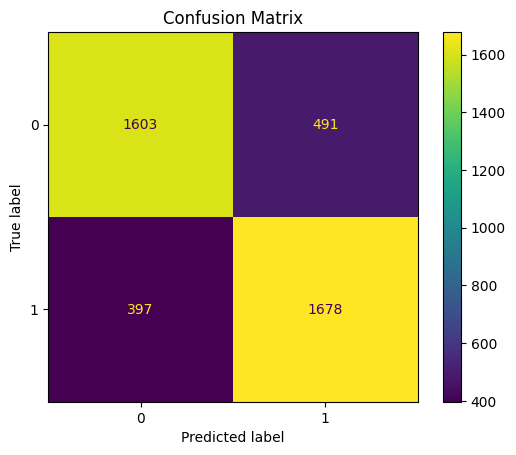

AttributeError: predict_proba is not available when probability=False

In [226]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = svm_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [220]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_selected, y_train_res)
y_pred_knn = knn_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_knn, zero_division=1))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2094
           1       0.78      0.83      0.81      2075

    accuracy                           0.80      4169
   macro avg       0.80      0.80      0.80      4169
weighted avg       0.80      0.80      0.80      4169

[[1616  478]
 [ 345 1730]]


In [221]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_selected, y_train_res)
y_pred_nb = nb_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_nb, zero_division=1))
print(confusion_matrix(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63      2094
           1       0.64      0.76      0.70      2075

    accuracy                           0.67      4169
   macro avg       0.67      0.67      0.66      4169
weighted avg       0.67      0.67      0.66      4169

[[1199  895]
 [ 493 1582]]


In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_selected, y_train_res)

print(f"Best parameters for SVM: {grid_search_svm.best_params_}")

y_pred_svm_optimized = grid_search_svm.predict(X_test_selected)
print(classification_report(y_test, y_pred_svm_optimized, zero_division=1))


Best parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2094
           1       0.85      0.74      0.79      2075

    accuracy                           0.81      4169
   macro avg       0.81      0.80      0.80      4169
weighted avg       0.81      0.81      0.80      4169



In [223]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_selected, y_train_res)

print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

y_pred_knn_optimized = grid_search_knn.predict(X_test_selected)
print(classification_report(y_test, y_pred_knn_optimized, zero_division=1))


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2094
           1       0.80      0.83      0.81      2075

    accuracy                           0.81      4169
   macro avg       0.81      0.81      0.81      4169
weighted avg       0.81      0.81      0.81      4169



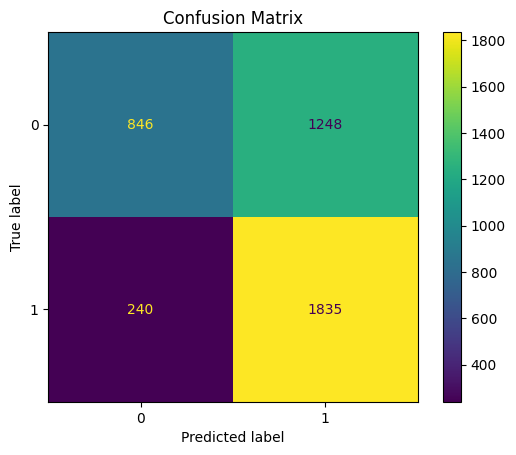

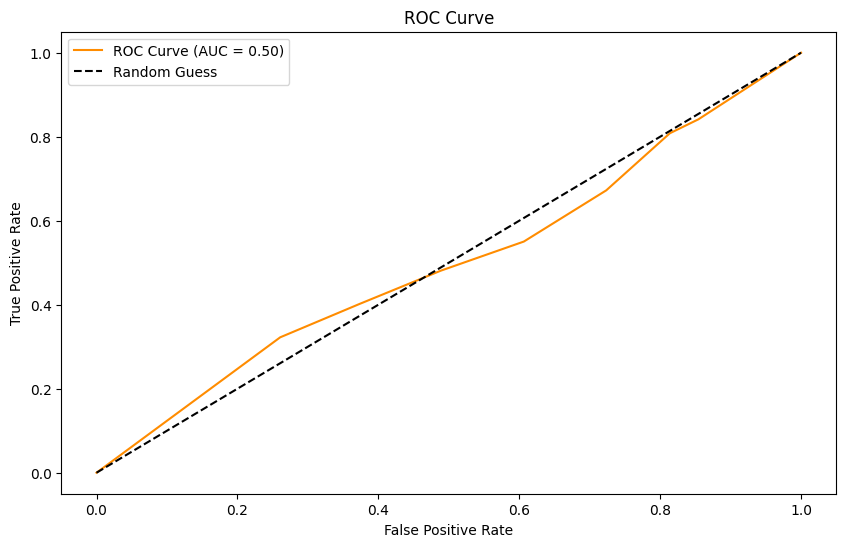

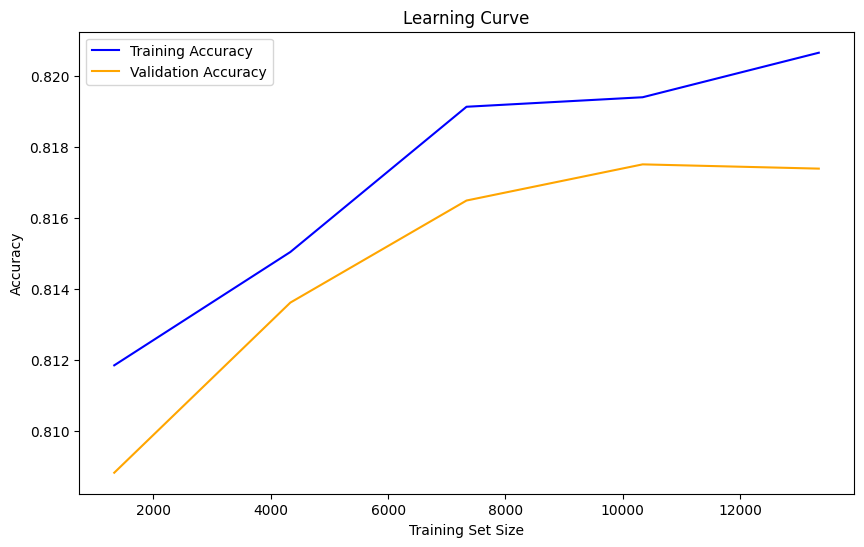

In [261]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_knn.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = grid_search_knn.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()